이하 코드는 "파이썬으로 배우는 머신러닝의 교과서" 7장 신경망 두번째 예제와 설명 정리입니다.
# 케라스 라이브러리를 이용한 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(1)
import keras.optimizers
from keras.models import Sequential
from keras.layers.core import Dense, Activation


#데이터 로드 ------
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

Using TensorFlow backend.


In [2]:
def Show_data(x,t):
    wk, n = t.shape
    c = [[0,0,0],[.5,.5,.5], [1,1,1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1,0], x[t[:, i] == 1,1],
                linestyle = 'none', marker='o',
                markeredgecolor='red',
                color=c[i], alpha=0.8)
    plt.grid(True)
    

In [3]:
np.random.seed(1)


#--- Sequential 모델 작성
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid', kernel_initializer='uniform'))  
             # 전결합층 / 노드갯수/ 입력차원=2/ 시그모이드 / 균일난수
model.add(Dense(3, activation='softmax', kernel_initializer='uniform'))
sgd = keras.optimizers.SGD(lr=1, momentum=0.0, decay=0.0, nesterov = False) # 스토캐스틱 경사하강 /학습률=1 
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) # 오차함수 교차엔트로피 / 평가 방법 정답률계산

#-- 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs = 1000, batch_size=100,verbose=0, validation_data = (X_test,T_test))
                            # epochs = 전체 데이터를 총 1000번 쓰겠다 / batch_size = 전체데이터에서 100개씩 배치로 써서 학습
#-- 테스트
score = model.evaluate(X_test, T_test, verbose=0)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'.format(score[0], score[1]))
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))


cross entropy 0.26, accuracy 0.90
Calculation time:1.400 sec


# 케라스 라이브러리를 이용하니 1.4초만에 학습

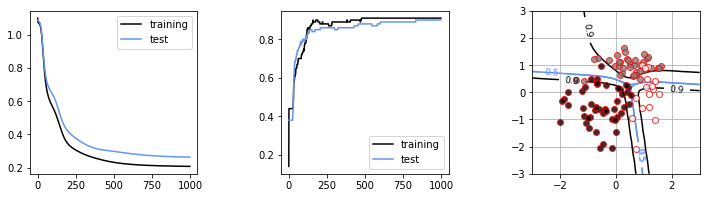

In [4]:
# 리스트 7-2-(4)
plt.figure(1, figsize = (12, 3))
plt.subplots_adjust(wspace=0.5)


# 학습 곡선 표시 --------------------------
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label='training') # (A)
plt.plot(history.history['val_loss'], 'cornflowerblue', label='test') # (B)
plt.legend()


# 정확도 표시 --------------------------
plt.subplot(1, 3, 2)
plt.plot(history.history['acc'], 'black', label='training') # (C)
plt.plot(history.history['val_acc'], 'cornflowerblue', label='test') # (D)
plt.legend()


# 경계선 표시 --------------------------
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
y = model.predict(x) # (E)
K = 3
for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=[
        'cornflowerblue', 'black'])
    cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
plt.show()